<a href="https://colab.research.google.com/github/medikid/ai_lotto/blob/master/notebooks/dashboards.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CHART DASHBOARDS

In [ ]:
#init colab notebooks

from google.colab import drive
drive.mount('/content/g_drive')

In [ ]:
#perform all actions at once
#!mkdir my_drive
!ln -s "/content/g_drive/My Drive/Colab/Datascience/ai_lotto" "/content"
%cd "/content/ai_lotto"

import sys
sys.path.append('/content/ai_lotto')
%cd notebooks/

In [ ]:
pwd

### Logs dashboards

In [4]:
%run 'db/models/training_session.py'
%run 'db/models/training_log.py'

from db.models import training_session, training_log
import matplotlib.pyplot as plt 

Setting up sqlite  sqlite:////home/work/ai_lotto/notebooks/db/ai_lotto.db
Setting up sqlite  sqlite:////home/work/ai_lotto/notebooks/db/ai_lotto.db


/usr/local/lib/python3.6/dist-packages/sqlalchemy/ext/declarative/clsregistry.py:129: SAWarning: This declarative base already contains a class with the same class name and module name as __main__.TrainingSession, and will be replaced in the string-lookup table.
  % (item.__module__, item.__name__)
/usr/local/lib/python3.6/dist-packages/sqlalchemy/ext/declarative/clsregistry.py:129: SAWarning: This declarative base already contains a class with the same class name and module name as __main__.TrainingLog, and will be replaced in the string-lookup table.
  % (item.__module__, item.__name__)


<Figure size 432x288 with 0 Axes>

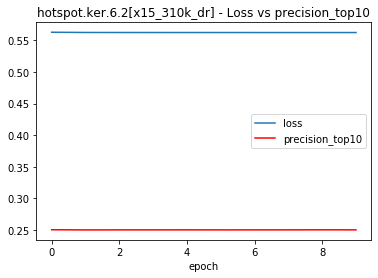

In [5]:
modset_id = "hotspot.ker.6.2[x15_310k_dr]";
#modset_id = "keno.ker.4.13[x15_2.528m_dr]"

trainingLog = training_log.TrainingLog(modset_id);
df_logs = trainingLog.get_dataframe();
df_logs.set_index('train_log_id', inplace=True)
logs = df_logs.loc[df_logs.modset_id == modset_id ]

logs.plot(kind='line',x='epoch',y='loss',ax=plt.gca())
logs.plot(kind='line',x='epoch',y='metric_value', legend='precision_top10', color='red', ax=plt.gca())

plt.title('{0} - Loss vs {1}'.format(modset_id, logs['metric_name'].unique()[0]))
plt.legend(['loss',logs['metric_name'].unique()[0]])
plt.show()


modset_id
hotspot.ker.4.13[x15_25k_dr]    1215
hotspot.ker.6.1[x15_310k_dr]      20
hotspot.ker.6.2[x15_310k_dr]      10
hotspot.ker.6.3[x15_310k_dr]      10
keno.ker.4.13[x15_2.528m_dr]      10
Name: epochs_total, dtype: int64


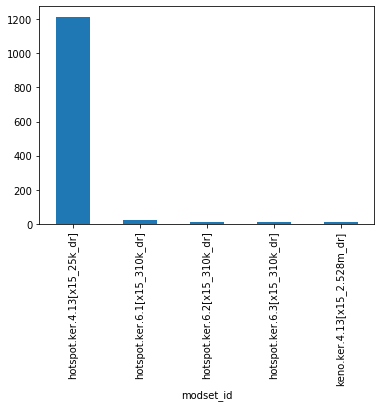

In [6]:
# List of sessions
sessions = training_session.TrainingSession(modset_id)
df_sessions = sessions.get_dataframe()
print(df_sessions.groupby('modset_id')['epochs_total'].sum())
df_sessions.groupby('modset_id')['epochs_total'].sum().plot(kind='bar')

In [9]:
modset_id = 'hotspot.ker.6.1[x15_310k_dr]'
logs = df_logs.loc[df_logs.modset_id == modset_id ]
logs

,train_sess_id,modset_id,datetime,epoch,loss,metric_name,metric_value
train_log_id,,,,,,,
318,20200528142723,hotspot.ker.6.1[x15_310k_dr],2020-05-28 14:32:24.567669,0,0.562942,precision_top10,0.250050
319,20200528142723,hotspot.ker.6.1[x15_310k_dr],2020-05-28 14:37:02.729050,1,0.562503,precision_top10,0.250299
320,20200528142723,hotspot.ker.6.1[x15_310k_dr],2020-05-28 14:41:42.156656,2,0.562462,precision_top10,0.250353
321,20200528142723,hotspot.ker.6.1[x15_310k_dr],2020-05-28 14:46:26.019937,3,0.562441,precision_top10,0.250260
322,20200528142723,hotspot.ker.6.1[x15_310k_dr],2020-05-28 14:51:07.611423,4,0.562425,precision_top10,0.250537
323,20200528142723,hotspot.ker.6.1[x15_310k_dr],2020-05-28 14:55:44.231053,5,0.562402,precision_top10,0.251782
324,20200528142723,hotspot.ker.6.1[x15_310k_dr],2020-05-28 15:00:29.080340,6,0.562370,precision_top10,0.253345
325,20200528142723,hotspot.ker.6.1[x15_310k_dr],2020-05-28 15:05:11.552781,7,0.562325,precision_top10,0.255267
326,20200528142723,hotspot.ker.6.1[x15_310k_dr],2020-05-28 15:09:47.066373,8,0.562272,precision_top10,0.257448


### Reference

https://queirozf.com/entries/pandas-dataframe-plot-examples-with-matplotlib-pyplot#plot-two-columns-as-scatter-plot
http://jonathansoma.com/lede/algorithms-2017/classes/fuzziness-matplotlib/understand-df-plot-in-pandas/